<a href="https://colab.research.google.com/github/JHWannabe/self-taught_machine_learning_code/blob/main/3%EC%9E%A5_%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.1 k - 최근접 이웃 회귀

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

Text(0, 0.5, 'weight')

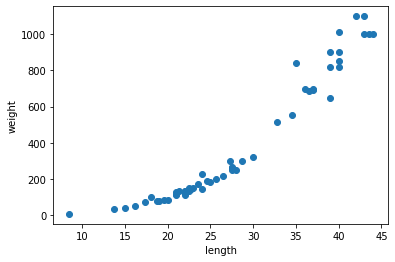

In [2]:
# 산점도

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

In [3]:
# 농어 데이터를 훈련, 테스트 데이터셋으로 구분

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
# scikit-learn에서 사용하기 위해서는 2차원 배열이여야 함. -> reshape 사용
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input.shape

(42, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# K-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)
knr.score(test_input, test_target)


0.992809406101064

In [6]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [7]:
knr.score(train_input, train_target)

0.9698823289099254

In [8]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [9]:
knr.predict([[50]])

array([1033.33333333])

Text(0, 0.5, 'weight')

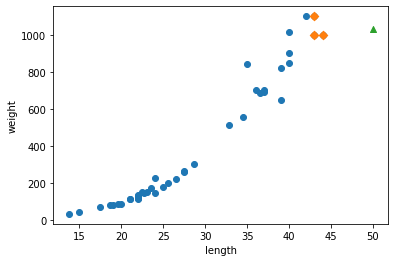

In [10]:
distance, indexs = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D' ) # 이웃샘플
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

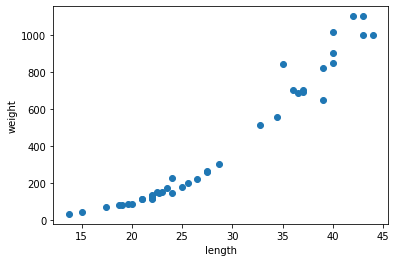

In [11]:
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

# 3.2 선형 회귀

In [12]:
# 타깃 데이터 불러오기
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape, train_target.shape)

(42, 1) (14, 1) (42,)


In [15]:
# 선형 회귀 구하기

lr = LinearRegression()

lr.fit(train_input, train_target)
lr.predict([[50]])
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


Text(0, 0.5, 'weight')

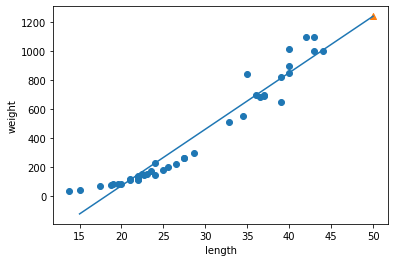

In [16]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [17]:
# 다항 함수 만들기
# 2차 함수 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [18]:
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])
print('길이 제곱 a,b:', lr.coef_ ,'intercept :', lr.intercept_)

길이 제곱 a,b: [  1.01433211 -21.55792498] intercept : 116.0502107827827


In [19]:
point = np.arange(15,50)

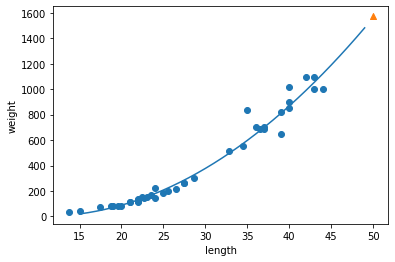

0.9706807451768623
0.9775935108325122


In [20]:
# train, input, target 변수 scatter
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50,1574 , marker='^')

#labeling
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#3.3 특성공학과 규제

In [21]:
import pandas as pd

df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [22]:
# 타깃 데이터 불러오기
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [23]:
#훈련, 테스트 데이터 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# 변환기 작동원리 살펴보기
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [25]:
#실제 데이터 적용
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
poly.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [26]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print( lr.score(train_poly,train_target) , lr.score(test_poly, test_target))

0.9903183436982124 0.9714559911594134


In [27]:
# 만약 고차항이라면?
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print( lr.score(train_poly, train_target) , lr.score(test_poly, test_target) )

0.9999999999991097 -144.40579242684848


In [28]:
# 규제를 위한 정규화 진행

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [29]:
# Ridge 회귀 모형

from sklearn.linear_model import Ridge 
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)
ridge.score(test_scaled, test_target)

# 최적의 alpha 값 찾기

import matplotlib.pyplot as plt
import numpy as np
train_score = []
test_score = []

Text(0, 0.5, 'R^2')

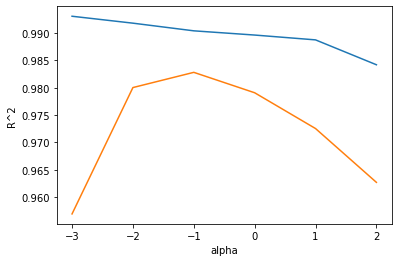

In [30]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

In [31]:
ridge = Ridge(alpha = 0.01)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9917809981250542 0.98001879368729


In [32]:
# 라쏘회귀로 해보기
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target),
lasso.score(test_scaled, test_target))

0.989789897208096 0.9800593698421883


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'R^2')

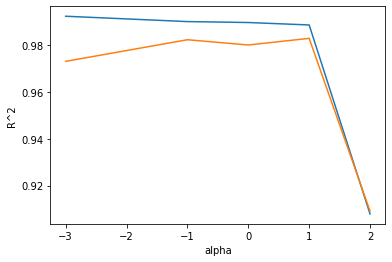

In [33]:
# alpha 바꾸어가며 그래프 그리기
alpha_list = [0.001, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alpha_list :
    lasso = Lasso(alpha = alpha, max_iter= 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

In [34]:
# alpha 가 10일 때 모델링과 Lasso 가 회귀계수를 0으로 만든 특성 갯수 확인
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(np.sum(lasso.coef_==0))

40
